# Redes Neuronales Convolucionales

### Ejemplo Flowers

El dataset está en: https://www.tensorflow.org/datasets/catalog/tf_flowers

### Importar Tensorflow

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

### Descargar el dataset
El dataset Flowers cuenta con un total de 3,670 imágenes de escenas donde hay flores. Se trata de identificar las flores presentes en la imagen, correspondientes a 5 clases, a saber: 'daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'.

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

228813984/228813984 [==============================] - 4s 0us/step


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (180, 180)

train_dataset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            validation_split=0.2,
                                                            subset="training",
                                                            seed=42,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            validation_split=0.2,
                                                            subset="validation",
                                                            seed=42,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


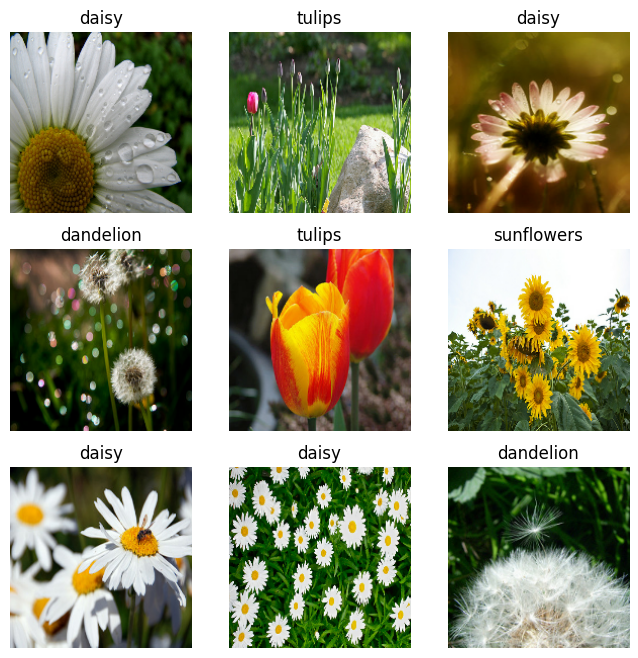

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(8, 8))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Estructura de la CNN
Aquí se crea la estructura de la parte de **convolución** de la red, se definen las capas que utilizará. Comúnmente se van colocando de forma secuencial capas Conv2D y MaxPooling2D.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

### Juntando y entrenando el modelo

In [ ]:
model.compile(optimizer='sgd',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])
epochs = 30
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs)

Epoch 1/30
92/92 [==============================] - 19s 71ms/step - loss: 1.5418 - accuracy: 0.3089 - val_loss: 1.4386 - val_accuracy: 0.3529
Epoch 2/30
92/92 [==============================] - 2s 26ms/step - loss: 1.3776 - accuracy: 0.4152 - val_loss: 1.2551 - val_accuracy: 0.4700
Epoch 3/30
92/92 [==============================] - 2s 23ms/step - loss: 1.2391 - accuracy: 0.4680 - val_loss: 1.1754 - val_accuracy: 0.4932
Epoch 4/30
92/92 [==============================] - 2s 23ms/step - loss: 1.1555 - accuracy: 0.5109 - val_loss: 1.1460 - val_accuracy: 0.5177
Epoch 5/30
92/92 [==============================] - 2s 23ms/step - loss: 1.1063 - accuracy: 0.5385 - val_loss: 1.1308 - val_accuracy: 0.5150
Epoch 6/30
92/92 [==============================] - 2s 25ms/step - loss: 1.0686 - accuracy: 0.5582 - val_loss: 1.1092 - val_accuracy: 0.5286
Epoch 7/30
92/92 [==============================] - 2s 27ms/step - loss: 1.0346 - accuracy: 0.5777 - val_loss: 1.0995 - val_accuracy: 0.5313
Epoch 8/30
9

### Evaluar el modelo

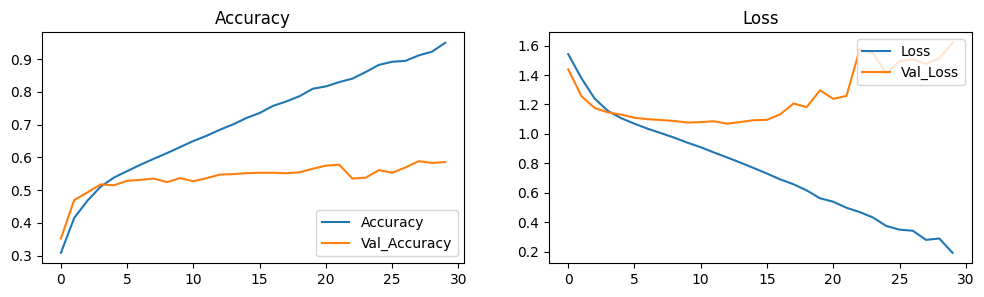

In [ ]:
from matplotlib import pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Accuracy')
plt.plot(epochs_range, val_acc, label='Val_Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss')
plt.plot(epochs_range, val_loss, label='Val_Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()